In [8]:
type(data_y), data_y.shape, type(data_x), data_x.shape

(numpy.ndarray, (137,), pandas.core.frame.DataFrame, (137, 6))

In [11]:
data_y[10]

(True, 42.)

In [10]:
data_y[0]

(True, 72.)

   Age_in_years  Celltype  Karnofsky_score  Months_from_Diagnosis  \
0          69.0  squamous             60.0                    7.0   
1          64.0  squamous             70.0                    5.0   
2          38.0  squamous             60.0                    3.0   
3          63.0  squamous             60.0                    9.0   
4          65.0  squamous             70.0                   11.0   

  Prior_therapy Treatment  
0            no  standard  
1           yes  standard  
2            no  standard  
3           yes  standard  
4           yes  standard  
Age_in_years              float64
Celltype                 category
Karnofsky_score           float64
Months_from_Diagnosis     float64
Prior_therapy            category
Treatment                category
dtype: object
   Age_in_years  Karnofsky_score  Months_from_Diagnosis  Celltype_large  \
0          69.0             60.0                    7.0           False   
1          64.0             70.0                 

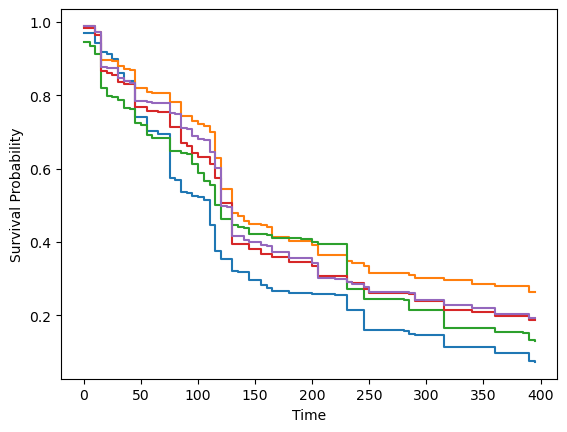

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sksurv.ensemble import RandomSurvivalForest
from sksurv.datasets import load_veterans_lung_cancer

# Load the Veterans' Lung Cancer dataset (available in sksurv)
data_x, data_y = load_veterans_lung_cancer()

# Convert the structured array to a DataFrame for easier manipulation
data_x = pd.DataFrame(data_x)

# Inspect the dataset
print(data_x.head())

# Identify categorical columns (e.g., 'celltype')
print(data_x.dtypes)

# One-hot encode the categorical columns (e.g., 'celltype')
data_x_encoded = pd.get_dummies(data_x, drop_first=True)

# Print the first few rows to check the transformation
print(data_x_encoded.head())

# Create a Random Survival Forest model
rsf = RandomSurvivalForest(n_estimators=100, min_samples_split=10, random_state=42)

# Fit the model using the encoded data and survival labels (time and event)
rsf.fit(data_x_encoded, data_y)

# Predict survival functions for the first few instances
pred_surv = rsf.predict_survival_function(data_x_encoded.iloc[:5])

# Plot the survival functions for the first instance
time_points = np.arange(0, 400, 5)
for fn in pred_surv:
    plt.step(time_points, fn(time_points), where="post")
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.show()

